# Love 3Blue1Brown Animations? Learn How to Create One in Python Using Manim
## TODO
![](images/pexels.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@eye4dtail?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>George Becker</a>
        on 
        <a href='https://www.pexels.com/photo/1-1-3-text-on-black-chalkboard-374918/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels.</a> All images are by the author unless specified otherwise.
    </strong>
</figcaption>

Do you know how many lines of code went into creating the Essence of Linear Algebra series of 3Blue1Brown?

> 22,466!

This gives an average of ~1400 lines per video. Now, multiply this number to about 100 *(fill in the adjective)* videos Grant Sanders has created and you can get a rough estimate of how much online math world is indebted to him.

# Higher-level overview of how Manim works

Manim was created as a bridge between [FFmpeg video encoding engine](https://en.wikipedia.org/wiki/FFmpeg) and Python. Since you can't communicate built-in Python data structures to FFmpeg, Manim implements several classes focused on mathematical object representation and animation.

These classes are generally divided into 3 categories: `Scene`, `Mobject` and `Animation`. To explain this concepts more clearly, let's create our very first animation:

```python
from manim import *


class MyFirstAnimation(Scene):
    def construct(self):
        # Create basic mobjects
        star = Star(n=5, fill_color=RED, stroke_color=BLUE)
        circle = Circle(fill_color=DARK_BLUE, fill_opacity=0.8, stroke_color=BLUE)

        # Animate Fade in of the star that takes 2 seconds
        self.play(FadeIn(star, run_time=2))
        # Wait for a second
        self.wait()
        # Transform star into a circle
        self.play(Transform(star, circle))
        self.wait(0.5)
        # Remove the circle by fading it out
        self.play(FadeOut(circle))
```

After you have installed Manim using [these instructions](https://docs.manim.community/en/stable/installation.html) and saving the above code in a script like `scenes.py`, run the following command in the command-line:

```
manim -pqh scenes.py MyFirstAnimation
```
and you will get the following output:

![](images/example_1.gif)

Congratulations! You just made your very first animation! Here is what the above command means - adding `-p` will enable you to play the video as soon as it is compiled. Combining it with `qh` means render it in high quality. There are 4 quality levels - low (`l`), medium (`m`), high (`h`) and 4k (`k`) with increasing render time. 

If you want a gif version of the animation like above just add `-i` after `-pqh`. Here is a [full list](https://docs.manim.community/en/stable/tutorials/configuration.html) of manim CLI commands.

# Breaking down basic Manim API

Let's understand how we got to the above animation by analyzing the code line by line. 

After importing all manim content in the first line, we are defining a scene class with a construct method:

```python
class MyFirstAnimation(Scene):
    def construct(self):
```

This is the general formula of creating a single animation - you define a custom class that inherits from the `Scene` class and has a `construct` method. `Scene` class is the higher-level building block of Manim which connects all related animations and objects into a single structure.

Next, we are creating two objects (a star and a circle) that belong to a `Mobject` class (mathematical object). This `Mobject` class is a base data structure for many built-in mobjects like geometric shapes, vectors, coordinate systems, etc. Basically, everything that is not a scene and animation is a `Mobject`.

```python
class MyFirstAnimation(Scene):
    def construct(self):
        # Create basic mobjects
        star = Star(n=5, fill_color=RED, stroke_color=BLUE)
        circle = Circle(fill_color=DARK_BLUE, fill_opacity=.8, stroke_color=BLUE)
```

All `Mobject`s have their own properties like `fill_color`, `fill_opacity` or `n` for the number of points of the star mobject. 

Then, we have the `Animation` classes. In the above example, we are using 3 of them - `FadeIn`, `Transform` and `FadeOut`. All built-in `Animation` classes in manim accept mobjects as arguments and apply various effects to them. For example, `Transform` accepts two mobjects and plays out a smooth animation that converts the first one to the other.

```python
self.play(FadeIn(star, run_time=2))
# Wait for a second
self.wait()
# Transform star into a circle
self.play(Transform(star, circle))
self.wait(0.5)
# Remove the circle by fading it out
self.play(FadeOut(circle))
```

Every time you create an animation, you have to wrap it inside the `play` function so that they are rendered on the screen.

Lastly, we have the constants like `RED`, `BLUE`, `YELLOW`, `PI`, `TAU`, etc. These are part of the `constants` module of Manim and encode commonly used values as variables and are imported in the first line of the snippet:

In [1]:
from manim import *

YELLOW, RED, BLUE

Manim Community v0.9.0

('#FFFF00', '#FC6255', '#58C4DD')

In [2]:
PI, TAU  # 2 * PI

(3.141592653589793, 6.283185307179586)

# Controlling Mobjects and their location

By default, all mobjects added to the screen gets displayed in the `ORIGIN`:

In [3]:
ORIGIN

array([0., 0., 0.])

Manim uses numpy arrays to represent the screen in `x`, `y`, `z` coordinates. `z` will stay 0 as long as you are animating in the 2D space. To shift an object a single unit in either `x` or `y` direction, you can use constants `LEFT`, `RIGHT`, `UP` and `DOWN`:

In [6]:
LEFT, RIGHT, UP, DOWN

(array([-1.,  0.,  0.]),
 array([1., 0., 0.]),
 array([0., 1., 0.]),
 array([ 0., -1.,  0.]))

As an example, we will draw 4 mobjects at different locations in the screen and place a dot at the origin for reference:

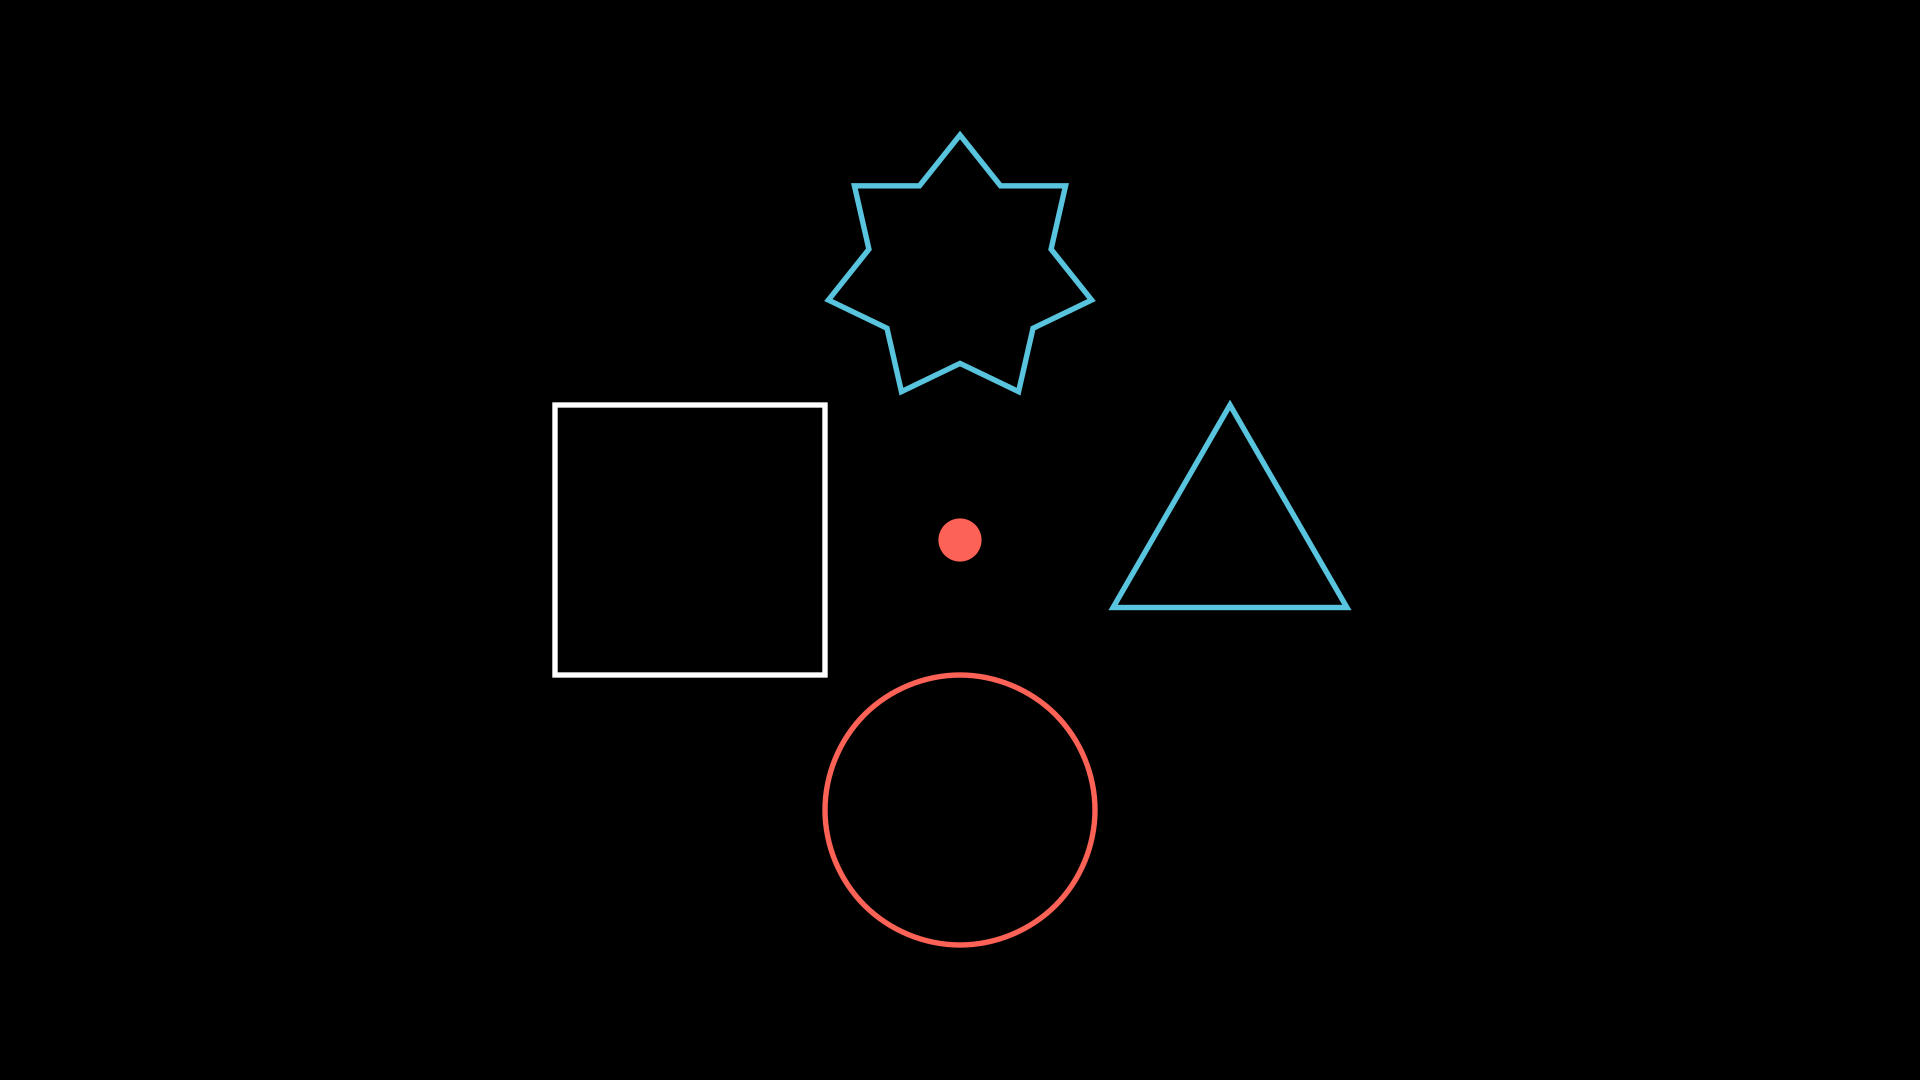

In [17]:
%%manim ShowCoordinates


class ShowCoordinates(Scene):
    def construct(self):
        # place a dot at the origin
        dot = Dot(radius=0.16, color=RED)  # twice the usual size
        # Add the dot to the screen
        self.add(dot)
        # Create 4 different mobjects and shift them from the origin
        square = Square().shift(2 * LEFT)
        triangle = Triangle().shift(2 * RIGHT)
        circle = Circle().shift(2 * DOWN)
        star = Star(n=7).shift(2 * UP)
        # Add all to the screen
        self.add(square, triangle, circle, star)

Since `LEFT`, `RIGHT`, etc. variables are Numpy arrays, they allow numeric operations that allow scaling them like above. There are also other built-in location variables like `UL` (UP + LEFT), `DR` (DOWN + RIGHT), etc.:

In [8]:
UL, DR

(array([-1.,  1.,  0.]), array([ 1., -1.,  0.]))

In the above snippet, we are using the `shift` method of the mobjects by passing their new coordinate location. Since `shift` is only a function, the actual shifting does not get animated. To display mobjects that aren't animated, we use the `add` method.

What if we wanted to animate that shifting motion? Well, you can just chain `shift` after the `animate` function like so:

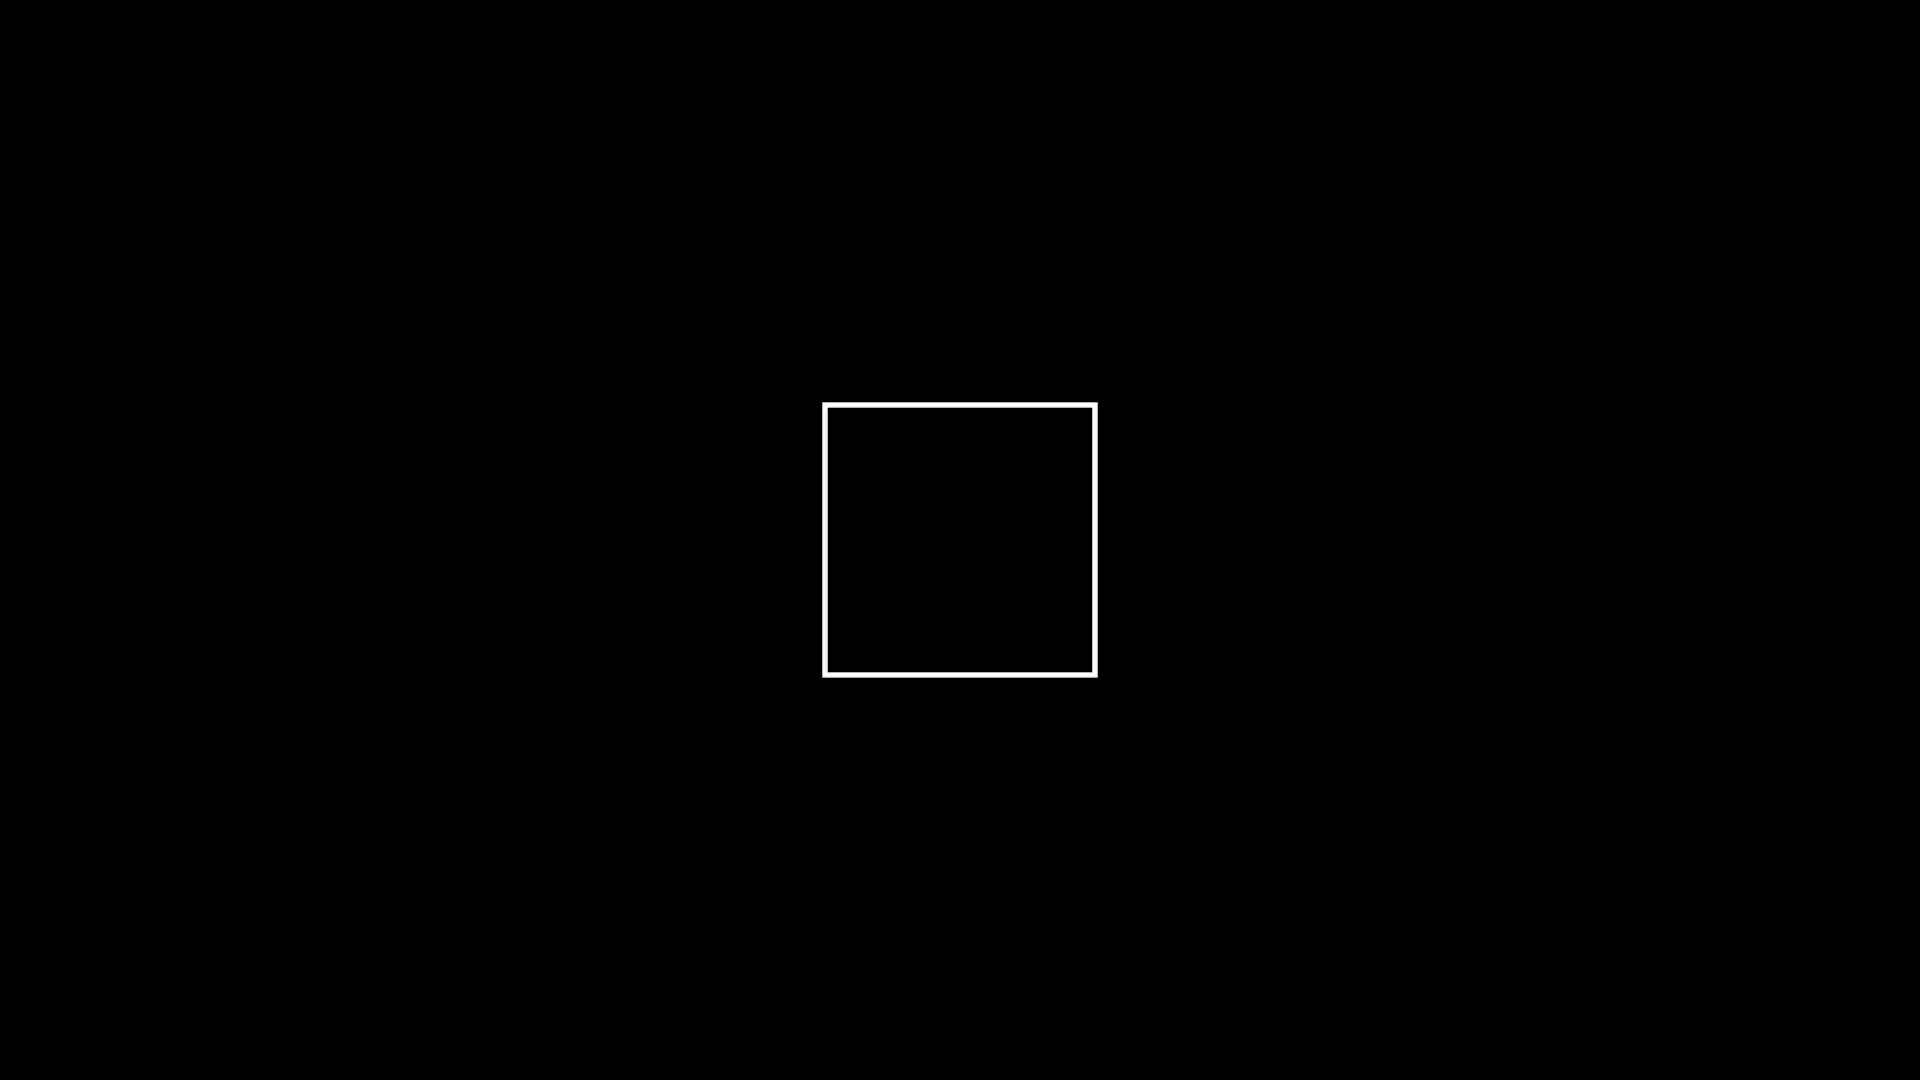

In [16]:
%%manim -i ShowCoords2


class ShowCoords2(Scene):
    def construct(self):
        # place a dot at the origin
        dot = Dot(radius=0.16, color=RED)  # twice the usual size
        # Create 4 different mobjects and animate their shift
        new_locations = [2 * UL, 2 * UR, 2 * DL, 2 * DR]
        mobjects = [Square(), Triangle(), Circle(), Star(n=7)]
        for loc, mob in zip(new_locations, mobjects):
            self.play(mob.animate.shift(loc))

        # Add the dot with Create animation
        self.play(Create(dot))

In fact, with `animate` method, you can animate almost any type of change to an mobject. For example, mobjects have several methods that start with `set_*` that changes their attributes. Here is an example:

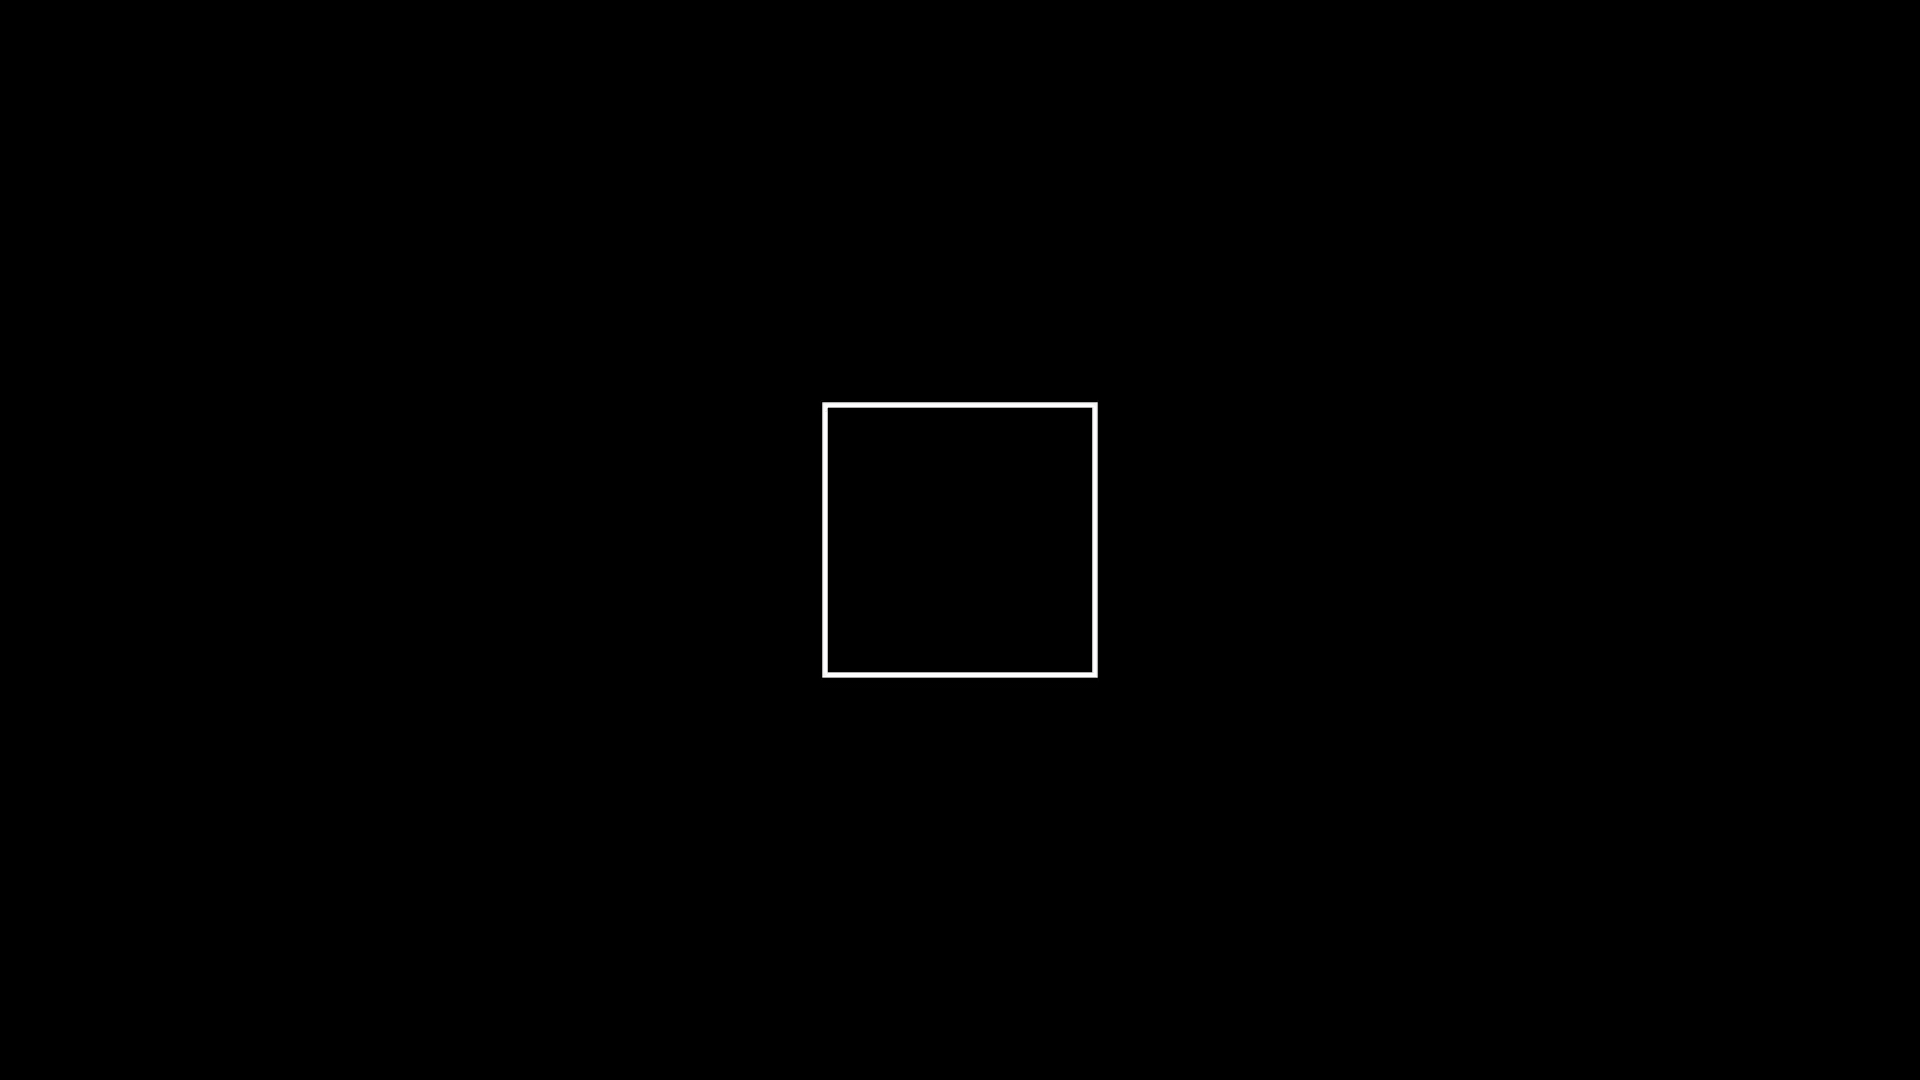

In [15]:
%%manim -i AnimateAttribs

config.media_width = "50vw"
config.verbosity = "CRITICAL"


class AnimateAttribs(Scene):
    def construct(self):
        # Create a simple square
        square = Square(side_length=2)

        # Scale to twice the size
        self.play(square.animate.scale(2))
        # Rotate
        self.play(square.animate.rotate(PI / 3))  # Rotate 60 degrees
        # Change the fill color and opacity
        self.play(square.animate.set_fill(RED, opacity=0.3))

# Animating functions

Let's get a bit more serious and learn how to draw functions and animate their creation. From now on, I will be using JupyterLab and its `%%manim` cell magic to render the manim output. The syntax is exactly the same as the CLI interface.

```python
%%manim -i -qh -o func_example FunctionExample
import numpy as np

class FunctionExample(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-5, 5, .5],
            y_range=[-3, 4, 1],
            x_axis_config={"numbers_to_include": [-4, -3, 3, 4]},
            y_axis_config={"numbers_to_include": [-2, 2, 3]},
            tips=True
        )
        axes_labels=axes.get_axis_labels()
        # Get the graph of a simple functions
        graph = axes.get_graph(lambda x: np.sin(1/x), color=RED)
        # Set up its label
        graph_label = axes.get_graph_label(
            graph, x_val=1, direction=2 * UP + RIGHT,
           label=r'f(x) = \sin(\frac{1}{x})', color=DARK_BLUE
        )

        # Graph the axes components together
        axes_group = VGroup(axes, axes_labels)
        
        # Animate
        self.play(Create(axes_group), run_time=2)
        self.wait(0.25)
        self.play(Create(graph), run_time=3)
        self.play(Write(graph_label), run_time=2)   
```

![](images/func_example.gif)

To draw a 2D axes like in Matplotlib, call the Axes class with the desired arguments. Optionally, you can call `get_axis_labels` method to retrieve the axis labels. `Axes` class inherits from the `CoordinateSystem` class. Check out the hyperlinked documentations to learn more about them.

Next, we are using the `get_graph` method, passing the function we want to draw. This built-in method only accepts single variable functions that return a one-to-one mapping between `x` and `y`. In the above example, we are drawing the graph of $f(x) = \sin(\frac{1}{x})$. 

```python
# Get the graph of a simple functions
graph = axes.get_graph(lambda x: np.sin(1/x), color=RED)
```
Optionally, you can specify the label at a specific location using `get_graph_label`:

```python
# Set up its label
graph_label = axes.get_graph_label(
    graph, x_val=1, direction=2 * UP + RIGHT,
   label=r'f(x) = \sin(\frac{1}{x})', color=DARK_BLUE
)
```

Finally, we are creating two groups of mobjects using the `VGroup` class. It is very versatile and allows many animations and transformations on multiple mobjects. I plan to make a detailed article on it specifically in the future. 

Also, don't forget to draw each mobject you created. Either use animation functions like `Create`/`Write` or simply use `self.add`.